In [191]:
import pyodbc 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import date

In [192]:
connection_string = ("DRIVER={ODBC Driver 17 for SQL Server};"
            "Server=192.168.2.50;"
            "Database=ComsDB;"
            "UID=sa;"
            "PWD=abc123?;")

In [193]:
connection = pyodbc.connect(connection_string)

In [194]:
data=pd.read_sql('select DeviceID,UniqueID,Command,Reason,DeviceDateTime,Latitude,Longitude,Speed,GPSDirection,IgnitionStatus,IOString,GPSFix,Satellites,FMSTempature,FMSFuelLevel,FMSOdometer,Odometer,MainPower FROM TblTrackerData where Reason!=105 AND DeviceID IN  (select distinct DeviceID from TblTrackerData GROUP BY DeviceID HAVING COUNT(DeviceID) > 100) order by DeviceDateTime ',connection)              


In [195]:
data

,DeviceID,UniqueID,Command,Reason,DeviceDateTime,Latitude,Longitude,Speed,GPSDirection,IgnitionStatus,IOString,GPSFix,Satellites,FMSTempature,FMSFuelLevel,FMSOdometer,Odometer,MainPower
0,359804086360098,44005,3,27,2000-01-01 00:01:50,-42933.06582,43.77231,0.0,0.0,0,14=0|15=0|23=0|24=231|25=0|26=0|39=0|149=0|165...,0,0,0,0.0,0.0,137523.132,13.122
1,359804086360098,56824,3,27,2000-01-01 00:02:27,-42931.40228,64.99602,0.0,0.0,1,14=0|15=0|23=0|24=231|25=0|26=0|39=0|149=0|165...,0,0,0,0.0,0.0,112133.257,14.399
2,359804086360098,44006,3,27,2000-01-01 00:02:29,-42932.87221,43.14594,0.0,0.0,0,14=0|15=0|23=0|24=231|25=0|26=0|39=0|149=0|165...,0,0,0,0.0,0.0,137523.132,13.147
3,359804086360098,43835,3,27,2000-01-01 00:02:31,-42924.59436,70.64421,0.0,0.0,0,14=0|15=0|23=0|24=231|25=0|26=0|39=0|149=0|165...,0,0,0,0.0,0.0,137522.854,10.657
4,359804086360098,43836,3,1,2000-01-01 00:02:38,-42924.60273,70.48797,0.0,0.0,1,14=0|15=0|23=0|24=231|25=0|26=0|39=0|149=0|165...,0,0,0,0.0,0.0,137522.854,10.682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360385,357042068930479,41484,3,22,2021-11-10 06:11:21,25.20963,55.27026,11.0,258.0,1,14=3|15=0|23=6|24=12|25=12|26=11|39=0|149=0|16...,1,0,0,0.0,0.0,869808.756,13.817
360386,359804086461235,58378,3,0,2021-11-10 06:11:42,25.23206,55.26157,0.0,0.0,1,14=0|15=0|23=0|24=231|25=0|26=0|39=0|149=0|165...,0,0,0,0.0,225700.0,225700.000,13.792
360387,359804086461235,58379,3,0,2021-11-10 06:12:42,25.23206,55.26157,0.0,0.0,1,14=0|15=0|23=0|24=231|25=0|26=0|39=0|149=0|165...,0,0,0,0.0,225700.0,225700.000,12.338
360388,359804086461235,58380,3,0,2021-11-10 06:13:42,25.23206,55.26157,0.0,0.0,1,14=0|15=0|23=0|24=231|25=0|26=0|39=0|149=0|165...,0,0,0,0.0,225701.0,225700.000,14.374


In [196]:
df=data

In [197]:
df.columns

Index(['DeviceID', 'UniqueID', 'Command', 'Reason', 'DeviceDateTime',
       'Latitude', 'Longitude', 'Speed', 'GPSDirection', 'IgnitionStatus',
       'IOString', 'GPSFix', 'Satellites', 'FMSTempature', 'FMSFuelLevel',
       'FMSOdometer', 'Odometer', 'MainPower'],
      dtype='object')

In [198]:
df['Date']=df.DeviceDateTime.dt.date

In [199]:
df['Time']=df.DeviceDateTime.dt.time

In [200]:
df['NDate'] = pd.to_datetime(df['Date']).apply(lambda date: date.toordinal())


In [201]:
df.head()

,DeviceID,UniqueID,Command,Reason,DeviceDateTime,Latitude,Longitude,Speed,GPSDirection,IgnitionStatus,...,GPSFix,Satellites,FMSTempature,FMSFuelLevel,FMSOdometer,Odometer,MainPower,Date,Time,NDate
0,359804086360098,44005,3,27,2000-01-01 00:01:50,-42933.06582,43.77231,0.0,0.0,0,...,0,0,0,0.0,0.0,137523.132,13.122,2000-01-01,00:01:50,730120
1,359804086360098,56824,3,27,2000-01-01 00:02:27,-42931.40228,64.99602,0.0,0.0,1,...,0,0,0,0.0,0.0,112133.257,14.399,2000-01-01,00:02:27,730120
2,359804086360098,44006,3,27,2000-01-01 00:02:29,-42932.87221,43.14594,0.0,0.0,0,...,0,0,0,0.0,0.0,137523.132,13.147,2000-01-01,00:02:29,730120
3,359804086360098,43835,3,27,2000-01-01 00:02:31,-42924.59436,70.64421,0.0,0.0,0,...,0,0,0,0.0,0.0,137522.854,10.657,2000-01-01,00:02:31,730120
4,359804086360098,43836,3,1,2000-01-01 00:02:38,-42924.60273,70.48797,0.0,0.0,1,...,0,0,0,0.0,0.0,137522.854,10.682,2000-01-01,00:02:38,730120


In [202]:
test_data=df[['DeviceID','Speed','FMSFuelLevel','FMSOdometer','Odometer','NDate']].groupby('NDate')

In [203]:
test_data.head()

,DeviceID,Speed,FMSFuelLevel,FMSOdometer,Odometer,NDate
0,359804086360098,0.0,0.0,0.0,137523.132,730120
1,359804086360098,0.0,0.0,0.0,112133.257,730120
2,359804086360098,0.0,0.0,0.0,137523.132,730120
3,359804086360098,0.0,0.0,0.0,137522.854,730120
4,359804086360098,0.0,0.0,0.0,137522.854,730120
...,...,...,...,...,...,...
355871,359804083630527,0.0,58.0,37135.0,37209.463,738104
355872,359804081923890,0.0,88.0,127836.0,127838.437,738104
355873,359804081923890,0.0,86.0,127836.0,127838.437,738104
355874,359804081285977,0.0,68.0,71153.0,71154.137,738104


In [204]:
df[df['FMSFuelLevel']!=0.0]['NDate'].value_counts(ascending=False)

738104    1411
737946    1140
738020    1119
737927    1024
738101    1010
          ... 
737562       2
737527       2
737551       1
737557       1
737565       1
Name: NDate, Length: 630, dtype: int64

In [205]:
df[(df['FMSFuelLevel']!=0.0)&(df['NDate']==738104)]['DeviceID'].value_counts(ascending=False)

359804081280481    60
359804081285936    60
359804081923890    54
359804083606865    36
351698100824537    32
                   ..
359804083650004     3
359804083718892     2
359804086360494     2
359804081280606     1
357042068904888     1
Name: DeviceID, Length: 88, dtype: int64

In [206]:
df[df.NDate==738104]['DeviceID'].value_counts(ascending=False)

359804081283873    486
359804081923908    317
359804083630360    169
357042068928226     87
359804081251078     86
                  ... 
359804086360494      2
359804083718892      2
357042067066507      1
359804081280606      1
357042068904888      1
Name: DeviceID, Length: 204, dtype: int64

In [207]:
df[df['FMSFuelLevel']!=0.0]['DeviceID'].value_counts(ascending=False)

357042068904888    8911
359804081280481    8626
359804083680639    8230
359804086360007    7683
357042068932236    7354
                   ... 
359804083621203      11
359804083711863       8
359804083720112       5
359804083606659       5
357042068927319       1
Name: DeviceID, Length: 216, dtype: int64

In [208]:
test_data = df[(df["NDate"]==738104)&(df.DeviceID=='359804081280481')]

In [209]:
test_data.head()

,DeviceID,UniqueID,Command,Reason,DeviceDateTime,Latitude,Longitude,Speed,GPSDirection,IgnitionStatus,...,GPSFix,Satellites,FMSTempature,FMSFuelLevel,FMSOdometer,Odometer,MainPower,Date,Time,NDate
355897,359804081280481,38433,3,0,2021-11-10 02:43:11,-42917.97378,114.75252,0.0,0.0,1,...,0,0,0,45.0,61864.0,61864.0,13.337,2021-11-10,02:43:11,738104
355898,359804081280481,38435,3,0,2021-11-10 02:44:12,-42917.69002,114.67268,0.0,0.0,1,...,0,0,0,44.0,61864.0,61864.0,13.261,2021-11-10,02:44:12,738104
355899,359804081280481,38436,3,0,2021-11-10 02:45:12,-42917.69002,114.67268,0.0,0.0,1,...,0,0,0,44.0,61864.0,61864.0,13.324,2021-11-10,02:45:12,738104
355900,359804081280481,38437,3,0,2021-11-10 02:46:12,-42917.69002,114.67268,0.0,0.0,1,...,0,0,0,44.0,61864.0,61864.0,13.337,2021-11-10,02:46:12,738104
355901,359804081280481,38438,3,0,2021-11-10 02:47:13,-42917.69002,114.67268,0.0,0.0,1,...,0,0,0,44.0,61864.0,61864.0,13.261,2021-11-10,02:47:13,738104


<AxesSubplot:xlabel='Odometer', ylabel='FMSFuelLevel'>

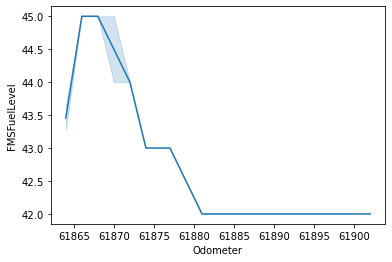

In [210]:
sns.lineplot(data=test_data,x='Odometer',y='FMSFuelLevel')

<AxesSubplot:xlabel='Odometer', ylabel='Speed'>

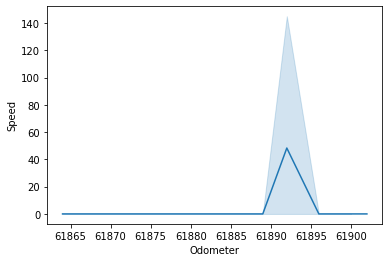

In [211]:
sns.lineplot(data=test_data,x='Odometer',y='Speed')

In [226]:
test2.head()

,DeviceID,Speed,FMSFuelLevel,FMSOdometer,Odometer,Time,Date
124311,359804083680639,0.0,58.0,53038.0,53038.0,17:50:57,737776
124312,359804083680639,0.0,58.0,53038.0,53038.0,17:51:57,737776
124702,359804083680639,0.0,63.0,53233.0,53232.0,12:19:31,737777
124704,359804083680639,0.0,63.0,53235.0,53232.0,12:20:31,737777
124705,359804083680639,0.0,64.0,53238.0,53238.0,12:25:33,737777


In [ ]:
sns.lineplot(data=test2,x='Odometer',y='FMSFuelLevel')

<AxesSubplot:xlabel='Odometer', ylabel='Speed'>

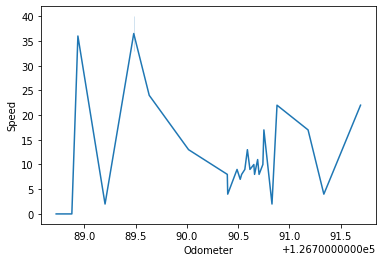

In [214]:
sns.lineplot(data=test2,x='Odometer',y='Speed')

In [215]:
test2.Odometer.min()

126788.724

In [216]:
test2.Odometer.max()

126791.694

<AxesSubplot:>

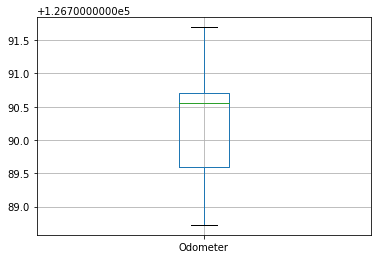

In [217]:
test2.boxplot(column='Odometer')

In [218]:
test2['SOdometer']=test2['Odometer']-test2['Odometer'].min()

/tmp/ipykernel_28975/111393614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['SOdometer']=test2['Odometer']-test2['Odometer'].min()


In [219]:
test2

,DeviceID,Speed,FMSFuelLevel,FMSOdometer,Odometer,Time,Date,SOdometer
357134,359804083680639,0.0,54.0,126785.0,126788.724,05:58:11,738104,0.000
357389,359804083680639,0.0,54.0,126785.0,126788.877,05:59:11,738104,0.153
357649,359804083680639,0.0,53.0,126785.0,126788.877,06:00:11,738104,0.153
357905,359804083680639,36.0,53.0,126785.0,126788.936,06:01:12,738104,0.212
358155,359804083680639,2.0,53.0,126785.0,126789.201,06:02:12,738104,0.477
358430,359804083680639,40.0,53.0,126786.0,126789.481,06:03:12,738104,0.757
358447,359804083680639,33.0,53.0,126786.0,126789.481,06:03:14,738104,0.757
358502,359804083680639,24.0,53.0,126786.0,126789.632,06:03:29,738104,0.908
358751,359804083680639,13.0,53.0,126786.0,126790.016,06:04:29,738104,1.292
358996,359804083680639,8.0,53.0,126786.0,126790.394,06:05:29,738104,1.670


<AxesSubplot:xlabel='SOdometer', ylabel='FMSFuelLevel'>

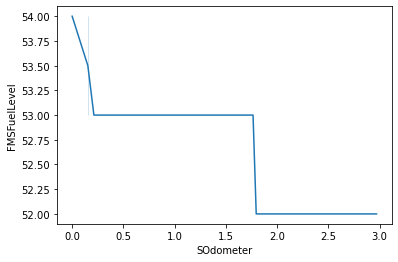

In [220]:
sns.lineplot(data=test2,x='SOdometer',y='FMSFuelLevel')


<AxesSubplot:xlabel='SOdometer', ylabel='Speed'>

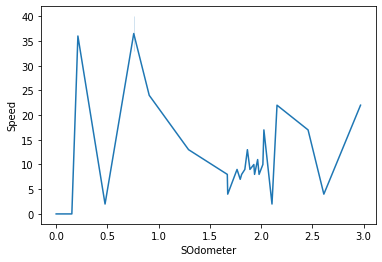

In [221]:
sns.lineplot(data=test2,x='SOdometer',y='Speed')

In [222]:
test2 = test1[(test1['FMSOdometer']!=0)&(test1.DeviceID=='359804083680639')]

<AxesSubplot:xlabel='Odometer', ylabel='FMSFuelLevel'>

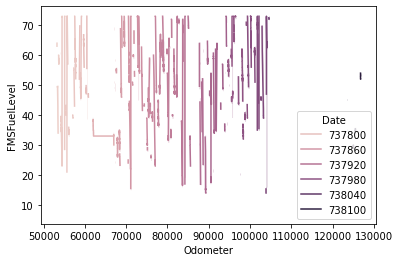

In [223]:
sns.lineplot(data=test2,x='Odometer',y='FMSFuelLevel',hue='Date')


In [225]:
df

,DeviceID,UniqueID,Command,Reason,DeviceDateTime,Latitude,Longitude,Speed,GPSDirection,IgnitionStatus,...,GPSFix,Satellites,FMSTempature,FMSFuelLevel,FMSOdometer,Odometer,MainPower,Date,Time,NDate
0,359804086360098,44005,3,27,2000-01-01 00:01:50,-42933.06582,43.77231,0.0,0.0,0,...,0,0,0,0.0,0.0,137523.132,13.122,2000-01-01,00:01:50,730120
1,359804086360098,56824,3,27,2000-01-01 00:02:27,-42931.40228,64.99602,0.0,0.0,1,...,0,0,0,0.0,0.0,112133.257,14.399,2000-01-01,00:02:27,730120
2,359804086360098,44006,3,27,2000-01-01 00:02:29,-42932.87221,43.14594,0.0,0.0,0,...,0,0,0,0.0,0.0,137523.132,13.147,2000-01-01,00:02:29,730120
3,359804086360098,43835,3,27,2000-01-01 00:02:31,-42924.59436,70.64421,0.0,0.0,0,...,0,0,0,0.0,0.0,137522.854,10.657,2000-01-01,00:02:31,730120
4,359804086360098,43836,3,1,2000-01-01 00:02:38,-42924.60273,70.48797,0.0,0.0,1,...,0,0,0,0.0,0.0,137522.854,10.682,2000-01-01,00:02:38,730120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360385,357042068930479,41484,3,22,2021-11-10 06:11:21,25.20963,55.27026,11.0,258.0,1,...,1,0,0,0.0,0.0,869808.756,13.817,2021-11-10,06:11:21,738104
360386,359804086461235,58378,3,0,2021-11-10 06:11:42,25.23206,55.26157,0.0,0.0,1,...,0,0,0,0.0,225700.0,225700.000,13.792,2021-11-10,06:11:42,738104
360387,359804086461235,58379,3,0,2021-11-10 06:12:42,25.23206,55.26157,0.0,0.0,1,...,0,0,0,0.0,225700.0,225700.000,12.338,2021-11-10,06:12:42,738104
360388,359804086461235,58380,3,0,2021-11-10 06:13:42,25.23206,55.26157,0.0,0.0,1,...,0,0,0,0.0,225701.0,225700.000,14.374,2021-11-10,06:13:42,738104
